In [1]:
#plotting a sound file in .wav format, sampling rate 44.1kHz

import matplotlib.pyplot as plt
from scipy.io import wavfile as wav


/Users/tahiyachowdhury/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


44100


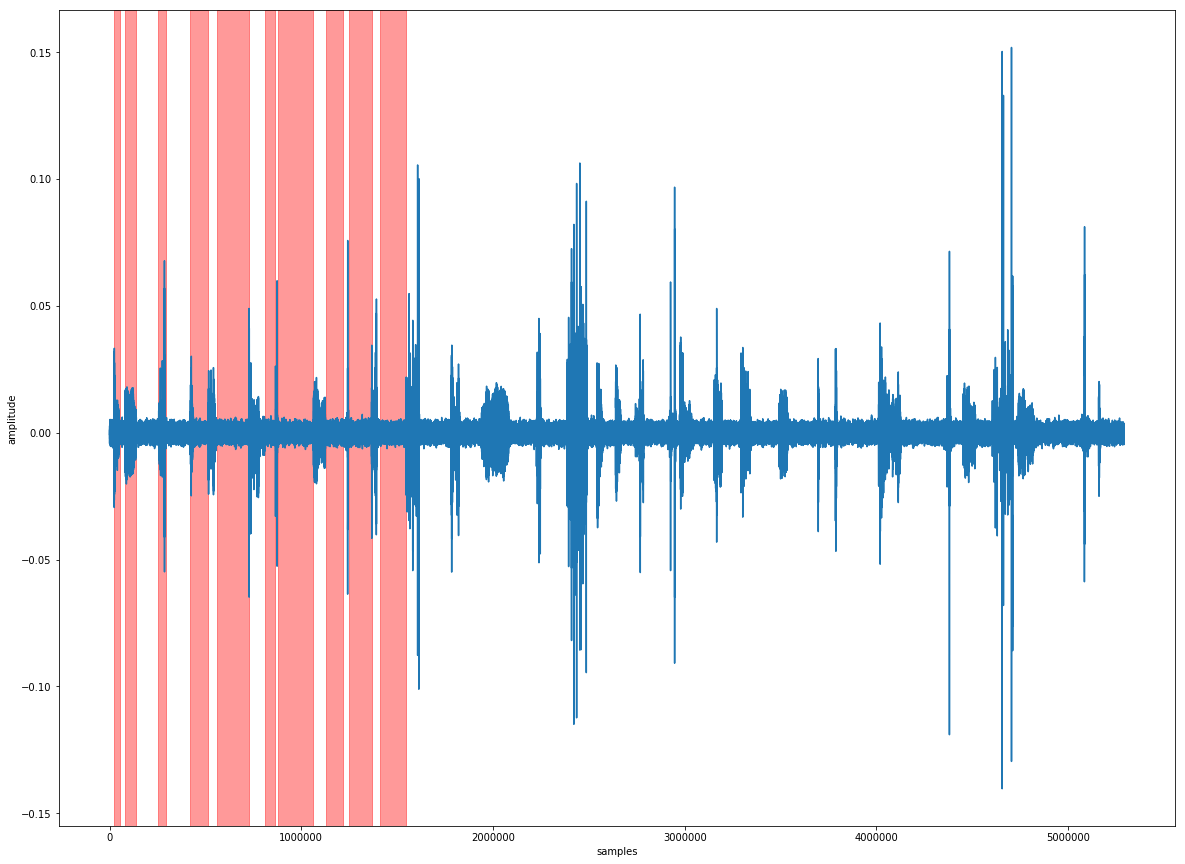

In [2]:
from __future__ import print_function
import librosa

# 1. Get the file path to the included audio example
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load('dev_1_ebr_6_nec_3_poly_0.wav', sr = 44100)

fig = plt.figure(figsize =(20,15))
plt.plot(y)
ax=plt.subplot(111)
ax.axvspan(22050, 54684, color='red', alpha=0.4)
ax.axvspan(80262, 140238 , color='red', alpha=0.4)
ax.axvspan(252693, 292383 , color='red', alpha=0.4)
ax.axvspan(418509, 515529 , color='red', alpha=0.4)
ax.axvspan(557865, 725886 , color='red', alpha=0.4)
ax.axvspan(809676, 864360 , color='red', alpha=0.4)
ax.axvspan(878472, 1062810 , color='red', alpha=0.4)
ax.axvspan(1127637,1218483 , color='red', alpha=0.4)
ax.axvspan(1249794, 1366659 , color='red', alpha=0.4)
ax.axvspan(1409877, 1547028 , color='red', alpha=0.4)

print (sr)
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.show()



In [3]:
import numpy as np
labels_1 = [0.50, 1.24, 1.82, 3.18, 
            5.73, 6.63, 9.49, 11.69, 
            12.65, 16.46, 18.36, 19.60, 
            19.92, 24.10, 25.57,27.63, 
            28.34, 30.99, 31.97, 35.08, 
            36.67, 40.39, 40.78, 40.93, 
            41.43, 43.98, 47.22, 50.48, 
            51.10, 54.12, 56.47, 57.63, 58.49, 59.84, 60.53, 61.90, 63.32, 66.05, 66.96, 67.41, 69.07, 71.47, 72.52, 74.65, 76.02, 79.17, 80.21, 83.75, 84.15, 85.81, 86.10, 90.95, 93.63, 98.66, 99.58, 100.95, 102.48, 104.40, 106.87, 107.49, 109.54, 114.70, 115.77, 116.98, 117.29]

In [4]:
segment_boundaries1=librosa.core.time_to_samples(labels_1, sr=44100)
print (segment_boundaries1)

[  22050   54684   80262  140238  252693  292383  418509  515529  557865
  725886  809676  864360  878472 1062810 1127637 1218483 1249794 1366659
 1409877 1547028 1617147 1781199 1798398 1805013 1827063 1939517 2082402
 2226168 2253510 2386692 2490327 2541483 2579409 2638944 2669373 2729790
 2792412 2912805 2952935 2972781 3045986 3151827 3198132 3292065 3352482
 3491397 3537260 3693375 3711015 3784221 3797009 4010895 4129083 4350906
 4391478 4451895 4519368 4604040 4712967 4740309 4830714 5058270 5105457
 5158818 5172489]


In [5]:
segment_size1= np.diff(segment_boundaries1)

In [6]:
print (segment_size1)

[ 32634  25578  59976 112455  39690 126126  97020  42336 168021  83790
  54684  14112 184338  64827  90846  31311 116865  43218 137151  70119
 164052  17199   6615  22050 112454 142885 143766  27342 133182 103635
  51156  37926  59535  30429  60417  62622 120393  40130  19846  73205
 105841  46305  93933  60417 138915  45863 156115  17640  73206  12788
 213886 118188 221823  40572  60417  67473  84672 108927  27342  90405
 227556  47187  53361  13671]


In [7]:
sorted_segment_size1 = np.sort(segment_size1)
print (sorted_segment_size1)

[  6615  12788  13671  14112  17199  17640  19846  22050  25578  27342
  27342  30429  31311  32634  37926  39690  40130  40572  42336  43218
  45863  46305  47187  51156  53361  54684  59535  59976  60417  60417
  60417  62622  64827  67473  70119  73205  73206  83790  84672  90405
  90846  93933  97020 103635 105841 108927 112454 112455 116865 118188
 120393 126126 133182 137151 138915 142885 143766 156115 164052 168021
 184338 213886 221823 227556]


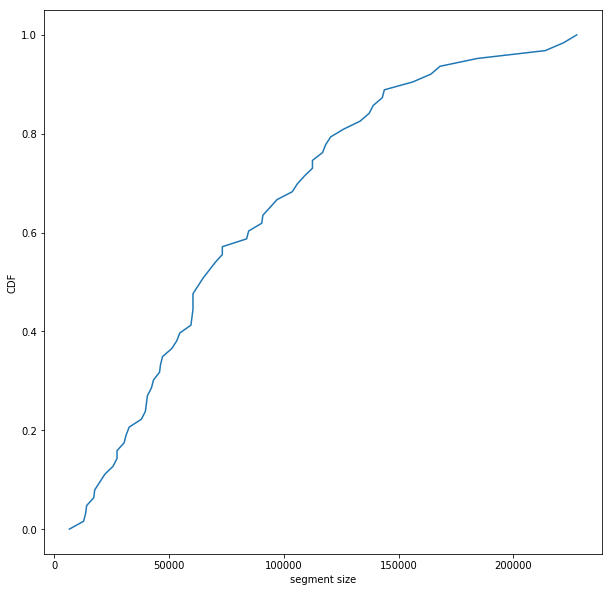

In [8]:
cdf_1=np.arange(len(sorted_segment_size1))/float(len(sorted_segment_size1)-1)
fig = plt.figure(figsize=(10,10))
plt.plot(sorted_segment_size1,cdf_1)
plt.xlabel('segment size')
plt.ylabel('CDF')
plt.show()


In [9]:
print (y)

[-0.00064087 -0.00012207 -0.00061035 ... -0.00088501 -0.0015564
  0.00079346]


In [10]:
y.shape


(5292000,)

In [11]:
y_reshape = y.reshape(-1, 1)
print (y_reshape)

[[-0.00064087]
 [-0.00012207]
 [-0.00061035]
 ...
 [-0.00088501]
 [-0.0015564 ]
 [ 0.00079346]]


In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Normalizing Example  (mean 0, std 1)
#norm = StandardScaler()
#acc_data1_normalized = norm.fit_transform(acc_data1)

scaler = MinMaxScaler(feature_range=(0.01, 0.99))
y_normalized = scaler.fit_transform(y_reshape)

In [13]:
print (y_normalized)

[[0.4784064 ]
 [0.48014617]
 [0.47850874]
 ...
 [0.4775877 ]
 [0.47533622]
 [0.48321635]]


In [14]:
y_32 = y_reshape.astype(np.float32)  ##converting data to float32
print (y_32)
print (y_32.dtype)

[[-0.00064087]
 [-0.00012207]
 [-0.00061035]
 ...
 [-0.00088501]
 [-0.0015564 ]
 [ 0.00079346]]
float32


In [ ]:
from itertools import islice
n=20000
y_windows = np.array(zip(*[islice(y_32[:150000], i, None, 1) for i in range(n)]))

In [ ]:
y_windows.shape

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(y_windows, test_size=0.50, shuffle= False)

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train = train.reshape((len(train), np.prod(train.shape[1:])))
test = test.reshape((len(test), np.prod(test.shape[1:])))



In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

In [ ]:
input_img = Input(shape=(20000,))

# "encoded" is the encoded representation of the input
encoded = Dense(2000, activation='sigmoid')(input_img) # layer 1 encoder
#encoded = Dense(16, activation='sigmoid')(encoded)    #layer 2 encoder 
#encoded = Dense(32, activation='sigmoid')(encoded)    #layer 2 encoder 

## setting ratio between between codebook size and input data size 0.1
# "decoded" is the lossy reconstruction of the input
#decoded = Dense(64, activation='sigmoid')(encoded)
decoded = Dense(20000, activation='sigmoid')(encoded)     # layer 2 decoder
#decoded = Dense(300, activation='sigmoid')(decoded)  # layer 1 encoder

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(2000,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))



In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

hist = autoencoder.fit(train, train,
                epochs=50,
                batch_size=128,
                shuffle=False,
                validation_data=(test, test))

In [ ]:
encoded_imgs = encoder.predict(test)
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
dist_dim=(len(encoded_imgs)-1, 1)
dist=np.zeros(dist_dim, dtype = 'float32') 

In [ ]:
for l in range(len(encoded_imgs)-2):
    #print (l)
    #dist[l]=np.linalg.norm((encoded_imgs[l]-encoded_imgs[l+1]), keepdims=True)
    dist[l]=np.divide(np.linalg.norm((encoded_imgs[l]-encoded_imgs[l+1]), keepdims=True), np.sqrt((np.linalg.norm(encoded_imgs[l]))*(np.linalg.norm(encoded_imgs[l+1]))))                                                          

In [ ]:
dist.size

In [ ]:
import matplotlib.pyplot as plt
distance = plt.figure(figsize=(30,10))
plt.plot(dist)
plt.ylabel('distance')
plt.xlabel('Data samples')
plt.title('Distance vs. Time')
distance.savefig('Distance vs. Time.png', dpi=distance.dpi)
plt.show()

In [ ]:
plot_dist = dist.reshape(len(encoded_imgs)-1)
print (plot_dist)

In [ ]:
plot_dist.ndim

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [ ]:
peaks, peak_heights= find_peaks(plot_dist)
peaks_fig = plt.figure(figsize=(20,10))
plt.plot(plot_dist)
plt.ylabel('distance')
plt.xlabel('Data samples')
plt.plot(peaks, plot_dist[peaks], "o", color="red")
#plt.plot(peak_heights, plot_dist[peak_heights], "X", color="red")
plt.title('Detected peaks')
plt.plot(np.zeros_like(plot_dist), "--", color="gray")
peaks_fig.savefig('Detected peaks.png', dpi=peaks_fig.dpi)
plt.show()

